In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cars = pd.read_csv('used_Updated.csv')

In [3]:
cars.drop(cars[cars['Godiste']<2000].index,inplace=True)

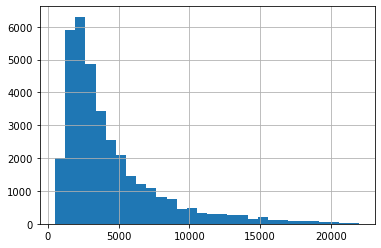

In [4]:
cars['Cena'].hist(bins=30)

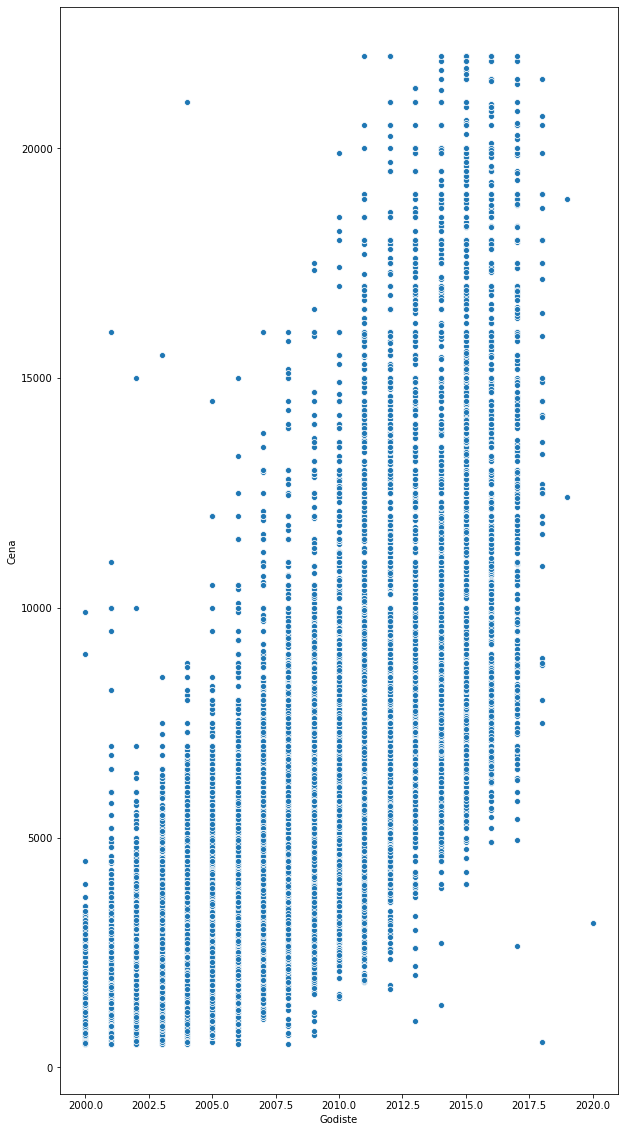

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.scatterplot(x='Godiste',y='Cena',data=cars)

In [6]:
for i in range(7):
    for year in range(2000,2021):
        max = cars[cars['Godiste']==year]['Cena'].max()
        min = cars[cars['Godiste']==year]['Cena'].min()
        cars.drop(cars[(cars['Godiste']==year) & (cars['Cena']==max)].index, inplace=True)
        cars.drop(cars[(cars['Godiste']==year) & (cars['Cena']==min)].index, inplace=True)

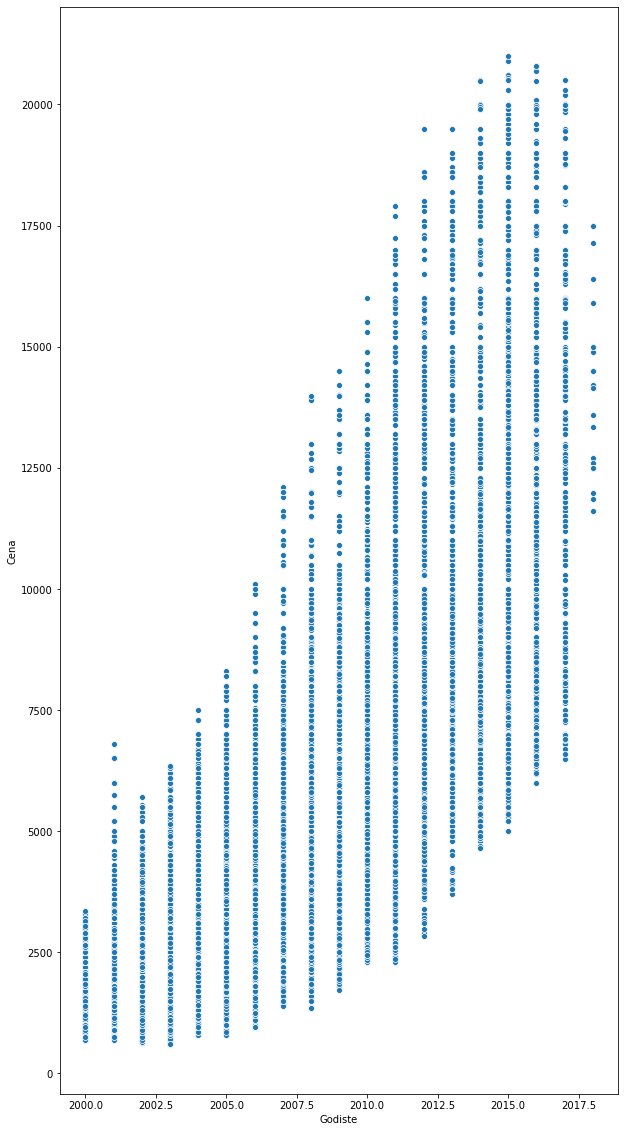

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.scatterplot(x='Godiste',y='Cena',data=cars)

In [114]:
years = cars.groupby('Godiste')

In [115]:
years['Cena'].std()

Godiste
2000     548.913604
2001     722.283758
2002     749.798982
2003     875.066826
2004    1068.756881
2005    1279.286445
2006    1364.736596
2007    1592.521596
2008    2055.924188
2009    2249.513883
2010    2545.921189
2011    3188.224961
2012    3505.761333
2013    3638.936335
2014    3985.612582
2015    3909.866595
2016    3710.008460
2017    3633.794365
2018    1756.578276
Name: Cena, dtype: float64

In [133]:
years['Cena'].mean()

Godiste
2000     3350
2001     6800
2002     5700
2003     6350
2004     7500
2005     8300
2006    10099
2007    12100
2008    13990
2009    14500
2010    15999
2011    17900
2012    19490
2013    19500
2014    20500
2015    21000
2016    20800
2017    20500
2018    17490
Name: Cena, dtype: int64

In [9]:
cars['Karoserija'].unique()

array(['Hecbek ', 'Limuzina ', 'Kupe ', 'Karavan ', 'Kabriolet/Roadster ',
       'Dzip/SUV ', 'Monovolumen (MiniVan) ', 'Pickup '], dtype=object)

In [19]:
cars['Karoserija']

0                       Hecbek 
1                       Hecbek 
2                     Limuzina 
3                       Hecbek 
4                       Hecbek 
                  ...          
37513    Monovolumen (MiniVan) 
37514    Monovolumen (MiniVan) 
37515    Monovolumen (MiniVan) 
37516    Monovolumen (MiniVan) 
37517    Monovolumen (MiniVan) 
Name: Karoserija, Length: 35239, dtype: object

In [17]:
cars.drop(cars[cars['Karoserija']=='Pickup '].index, inplace=True)

In [18]:
cars['Karoserija'].value_counts()

Hecbek                    12984
Karavan                    8351
Limuzina                   6724
Monovolumen (MiniVan)      3323
Dzip/SUV                   2883
Kupe                        622
Kabriolet/Roadster          352
Name: Karoserija, dtype: int64

In [26]:
import random
percent=1.4
user_cars = []
types = [['Hecbek ', 'Limuzina ', 'Karavan '],['Dzip/SUV ', 'Monovolumen (MiniVan) ', 'Karavan '],
         ['Kabriolet/Roadster ', 'Kupe '], ['Limuzina ',  'Karavan ']]

for t in types:
    for year in range(2000,2020): 
        min = cars[cars['Godiste']==year]['Cena'].min()
        max = cars[cars['Godiste']==year]['Cena'].max()
        mean = cars[cars['Godiste']==year]['Cena'].mean()
        try:
            step = round(mean*percent - mean)
            for price in range(min,max,step):
                models = cars[(cars['Cena']>price) & (cars['Cena']<price+step) & (cars['Godiste']==year) & cars['Karoserija'].isin(t)]['Model'].unique()
                if models.size > 0:
                    #print("Similar car models in price range between {} and {} in year {}".format(price,price+step,year))
                    models = list(models)
                    if len(models)>3:
                        users_count = random.randint(6,15)
                        for user in range(users_count):
                                car_count = random.randint(2,6)
                                if car_count>len(models):
                                    car_list=[k+'_'+str(random.randint(year-1,year+1)) for k in random.sample(models,len(models))]
                                    user_cars.append(car_list)
                                else:
                                    car_list=[k+'_'+str(random.randint(year-1,year+1)) for k in random.sample(models,car_count)]
                                    user_cars.append(car_list)
                    elif len(models)>=2:
                        car_list = [k+'_'+str(random.randint(year-1,year+1)) for k in models]
                        user_cars.append(car_list)
                    else:
                        pass

            percent = percent-0.015
        except ValueError:
            pass
print(user_cars)
print(len(user_cars))    

[['MEGANE_2000', 'WAGON R+_2000', 'FIESTA_1999', 'YPSILON_2000', '206_1999', '406_1999'], ['XSARA_2001', 'GOLF 4_1999', '156_2001', 'CIVIC_2001', 'BORA_2001', 'ASTRA F_2000'], ['FOCUS_1999', 'FIESTA_2000'], ['CORSA C_2000', 'BORA_2001', 'POLO_2000', 'PASSAT B5_2000'], ['YPSILON_2001', '147_2001', 'FIESTA_2001', '530_1999'], ['MONDEO_2000', 'LAGUNA_2001', '530_1999', 'ASTRA G_1999', 'GOLF 4_1999', 'E 200_2000'], ['156_2000', 'WAGON R+_2000', 'QASHQAI + 2_2001', 'SCENIC_2000'], ['ASTRA G_1999', 'VECTRA B_1999', 'CORSA C_2001', '530_2001', 'CLIO_2000'], ['VECTRA B_1999', 'CLIO_1999', 'CORSA C_2001', 'POLO_2000', 'MONDEO_1999', 'TWINGO_2001'], ['FOCUS_1999', 'XSARA_2001', 'CLIO_2001'], ['CLIO_2001', 'WAGON R+_2000', 'CORSA C_2000', 'MEGANE_1999', 'FOCUS_1999'], ['ASTRA G_2000', 'SCENIC_2000', '406_2000'], ['AVENSIS_2000', 'E 200_2000'], ['AVENSIS_1999', 'ASTRA G_2001', '530_2001', 'BRAVO_1999', '156_1999'], ['WAGON R+_2001', 'GOLF 4_2001', 'LAGUNA_2001', 'E 200_2001', 'FIESTA_1999', 'PRIUS

In [27]:
users = pd.DataFrame(user_cars,columns=['car1','car2','car3','car4','car5','car6'])
users

,car1,car2,car3,car4,car5,car6
0,MEGANE_2000,WAGON R+_2000,FIESTA_1999,YPSILON_2000,206_1999,406_1999
1,XSARA_2001,GOLF 4_1999,156_2001,CIVIC_2001,BORA_2001,ASTRA F_2000
2,FOCUS_1999,FIESTA_2000,None,None,None,None
3,CORSA C_2000,BORA_2001,POLO_2000,PASSAT B5_2000,None,None
4,YPSILON_2001,147_2001,FIESTA_2001,530_1999,None,None
...,...,...,...,...,...,...
4183,ML KLASA_2006,X5_2007,TOUAREG_2006,PRIUS +_2008,None,None
4184,X5_2007,PRIUS +_2007,ML KLASA_2006,None,None,None
4185,ML KLASA_2006,TOUAREG_2007,X5_2008,PRIUS +_2007,None,None
4186,X5_2006,ML KLASA_2007,PRIUS +_2006,TOUAREG_2008,None,None


In [28]:
users = users.fillna('')

In [29]:
users['combined']= users.values.tolist()
users

,car1,car2,car3,car4,car5,car6,combined
0,MEGANE_2000,WAGON R+_2000,FIESTA_1999,YPSILON_2000,206_1999,406_1999,"[MEGANE_2000, WAGON R+_2000, FIESTA_1999, YPSI..."
1,XSARA_2001,GOLF 4_1999,156_2001,CIVIC_2001,BORA_2001,ASTRA F_2000,"[XSARA_2001, GOLF 4_1999, 156_2001, CIVIC_2001..."
2,FOCUS_1999,FIESTA_2000,,,,,"[FOCUS_1999, FIESTA_2000, , , , ]"
3,CORSA C_2000,BORA_2001,POLO_2000,PASSAT B5_2000,,,"[CORSA C_2000, BORA_2001, POLO_2000, PASSAT B5..."
4,YPSILON_2001,147_2001,FIESTA_2001,530_1999,,,"[YPSILON_2001, 147_2001, FIESTA_2001, 530_1999..."
...,...,...,...,...,...,...,...
4183,ML KLASA_2006,X5_2007,TOUAREG_2006,PRIUS +_2008,,,"[ML KLASA_2006, X5_2007, TOUAREG_2006, PRIUS +..."
4184,X5_2007,PRIUS +_2007,ML KLASA_2006,,,,"[X5_2007, PRIUS +_2007, ML KLASA_2006, , , ]"
4185,ML KLASA_2006,TOUAREG_2007,X5_2008,PRIUS +_2007,,,"[ML KLASA_2006, TOUAREG_2007, X5_2008, PRIUS +..."
4186,X5_2006,ML KLASA_2007,PRIUS +_2006,TOUAREG_2008,,,"[X5_2006, ML KLASA_2007, PRIUS +_2006, TOUAREG..."


In [30]:
users.drop(columns=['car1','car2','car3','car4','car5','car6'], inplace=True)

In [31]:
users = users.explode('combined')
users['user_id'] = users.index
users

,combined,user_id
0,MEGANE_2000,0
0,WAGON R+_2000,0
0,FIESTA_1999,0
0,YPSILON_2000,0
0,206_1999,0
...,...,...
4187,ML KLASA_2008,4187
4187,,4187
4187,,4187
4187,,4187


In [33]:
users.to_csv('users.csv')

In [37]:
cars['car_id'] = cars['Model'] + '_' + cars['Godiste'].astype(str)

In [38]:
cars

,Brend,Cena,Godiste,Gorivo,Karoserija,Kilometraza,Kubikaza,Model,Snaga,car_id
0,ALFA ROMEO,2150,2007,Dizel,Hecbek,215000,1910,147,120,147_2007
1,ALFA ROMEO,2850,2006,Dizel,Hecbek,222000,1910,147,150,147_2006
2,ALFA ROMEO,1850,2004,Dizel,Limuzina,178000,1910,147,116,147_2004
3,ALFA ROMEO,1700,2004,Dizel,Hecbek,156906,1910,147,116,147_2004
4,ALFA ROMEO,1700,2002,Dizel,Hecbek,272000,1900,147,116,147_2002
...,...,...,...,...,...,...,...,...,...,...
37513,VOLKSWAGEN,4200,2006,Dizel,Monovolumen (MiniVan),251000,1900,TOURAN,105,TOURAN_2006
37514,VOLKSWAGEN,3550,2005,Dizel,Monovolumen (MiniVan),259000,1896,TOURAN,105,TOURAN_2005
37515,VOLKSWAGEN,7700,2011,Dizel,Monovolumen (MiniVan),214000,1598,TOURAN,105,TOURAN_2011
37516,VOLKSWAGEN,4490,2007,Dizel,Monovolumen (MiniVan),210000,1890,TOURAN,105,TOURAN_2007


In [39]:
cars.to_csv('CarIds.csv')